<div style="display: flex; background-color: RGB(220, 102, 160);" >
<h1 style="margin: auto; padding: 30px; ">PROJECT CNN NUMBERS</h1>
</div>

Context : numbers to predict

<div class="alert alert-block alert-warning"> USE </div>

<div style="background-color: RGB(165, 125, 186);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> Data and Libraries Importation</h2>
</div>

In [2]:
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense

from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
# from keras.preprocessing.image import ImageDataGenerator # the good one!!


In [8]:
df = pd.read_csv("data/train.csv")
train = df.copy()

In [9]:
df2 = pd.read_csv("data/test.csv")
test = df2.copy()

<div style="background-color: RGB(165, 125, 186);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Dataset Exploration </h2>
</div>

In [10]:
print(train.shape)
print('')
train.info()
train.head()

(42000, 785)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


❓ La target est le label?


In [11]:
train.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

<div style="background-color: RGB(165, 125, 186);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Model baseline</h2>
</div>

/home/indi/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


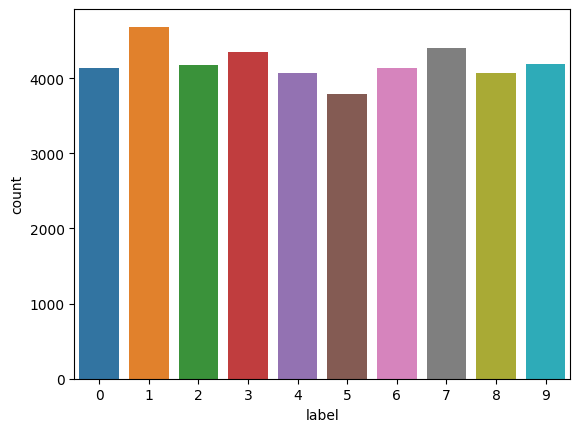

In [35]:
# IS THE DATASET REPRESANTATIVE?

numbers_count = sns.countplot(train.label)

<div class="alert alert-info">
We have similar counts for them all.
</div>

In [37]:
#Separation Target
Y = train["label"]

# Drop 'label' column
X = train.drop(labels = ["label"],axis = 1) 

In [38]:
#Verifiaction

Y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [39]:
# Check the data
X.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [42]:
Y.dtypes
#Not Y since boolean??? 

dtype('int64')

In [43]:
Y.isnull()
# Ok it's just normal...

0        False
1        False
2        False
3        False
4        False
         ...  
41995    False
41996    False
41997    False
41998    False
41999    False
Name: label, Length: 42000, dtype: bool

<div class="alert alert-info">
There is no missing values in the train dataset. So we can safely go ahead.
</div>

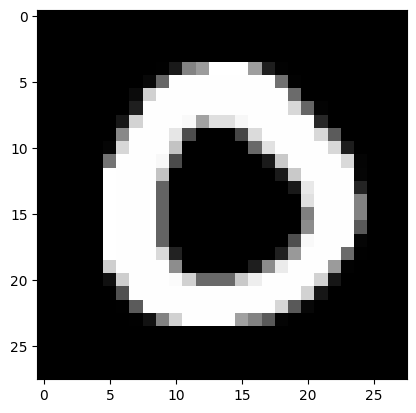

In [45]:
# observation feature 
obs  = np.array(X)
img= obs[4]
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.show()

In [46]:
print(X.shape)

(42000, 784)


<div class="alert alert-info">
*Normalisation*
    
Normalisation is done to reduce the scale of the input values. The pixel value ranges from 0 to 255 which specify gradient of gray. The CNN will converge more faster on values 0 to 1 than 0 to 255. So we divide every value by 255 to scale the data from [0..255] to [0..1]. It helps the model to better learning of features by decreasing computational complexities if we have data that scales bigger.
</div>

In [17]:
# Normalize the data (to reduce the effect of illumination's differences and CNN converg faster on [0..1] data than on [0..255])

# X_train = X / 255.0


<div class="alert alert-info">
Reshape
The array of pixel values are reshaped into a (28,28,1) matrix. We are feeding the CNN model with input_shape of 28x28x1 matrix.
    
Train and test images (28px x 28px) has been stock into pandas.Dataframe as 1D vectors of 784 values. We reshape all data to 28x28x1 3D matrices.

Keras requires an extra dimension in the end which correspond to channels. MNIST images are gray scaled so it use only one channel. For RGB images, there is 3 channels, we would have reshaped 784px vectors to 28x28x3 3D matrices.
</div>

In [18]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)

# X_train = X_train.values.reshape(-1,28,28,1)
# test = test.values.reshape(-1,28,28,1)

<div class="alert alert-info">
Label Encoding

Since the CNN model will give results in a vector of predictions for each classes. The label (numbers) are encoded into hot vector for prediction by the model. So that we can train the CNN with the encoded outputs and the parameters are tuned accordingly
</div>

In [51]:
# split training and val
X_train, X_val, Y_train, Y_val = train_test_split(X,Y,test_size=0.33,random_state=42)

# reshape et normalisation  des data
X_train = ((X_train).values.reshape((-1,28,28,1)))/255.0
X_val = ((X_val).values.reshape((-1 ,28,28,1)))/255.0


<div class="alert alert-block alert-warning"> USE  ONE HOT OR NOT??? </div>

In [21]:
# Y_train = to_categorical(Y_train, num_classes = 10)

#To enable label into hot vector. For Eg.7 -> [0,0,0,0,0,0,0,1,0,0]

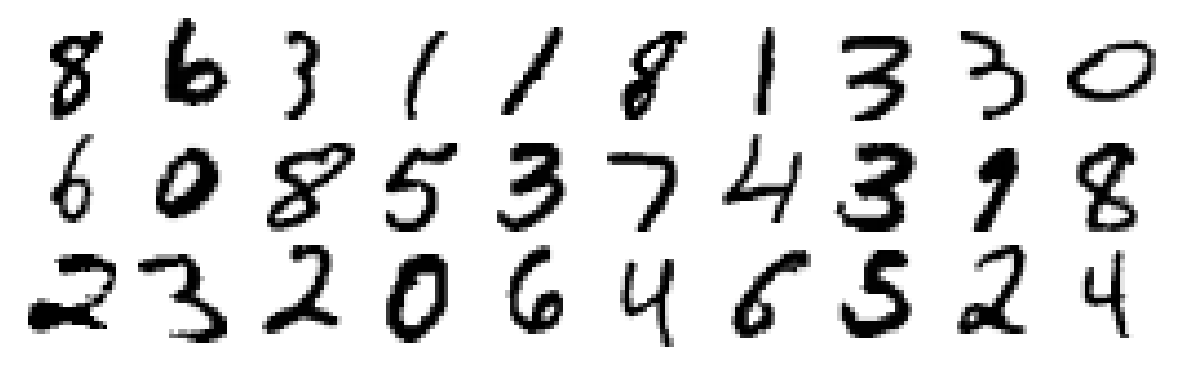

In [52]:
# PREVIEW IMAGES
plt.figure(figsize=(15,4.5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [53]:
print(Y_train.shape)
print(Y_val.shape)
print(X_train.shape)
print(X_val.shape)

(28140,)
(13860,)
(28140, 28, 28, 1)
(13860, 28, 28, 1)


In [56]:
# model = Sequential([

#         tf.keras.layers.Conv2D(8, (3, 3), activation='relu',input_shape=(28, 28, 1)), # applies kernels to our data
#         tf.keras.layers.MaxPooling2D(2, 2), # reduce dimension

#         tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
#         tf.keras.layers.MaxPooling2D(2, 2),

#         tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        

#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(128, activation='relu'),

#         tf.keras.layers.Dense(len(train.label.unique()), activation=tf.nn.softmax) # generalized logistic regression
#     ])


model = Sequential()

model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(train.label.unique()), activation='softmax'))


In [57]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 8)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 32)          4640      
                                                                 
 flatten_1 (Flatten)         (None, 288)              

In [59]:
# train neural network and have it automatically stop on 95% accuracy
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_val, Y_val),
                    batch_size=32, verbose=1)

Epoch 1/10
880/880 [==============================] - 13s 13ms/step - loss: 0.3038 - accuracy: 0.9060 - val_loss: 0.1076 - val_accuracy: 0.9665
Epoch 2/10
880/880 [==============================] - 11s 13ms/step - loss: 0.0911 - accuracy: 0.9715 - val_loss: 0.0806 - val_accuracy: 0.9747
Epoch 3/10
880/880 [==============================] - 15s 17ms/step - loss: 0.0664 - accuracy: 0.9796 - val_loss: 0.0768 - val_accuracy: 0.9772
Epoch 4/10
880/880 [==============================] - 12s 13ms/step - loss: 0.0532 - accuracy: 0.9834 - val_loss: 0.0519 - val_accuracy: 0.9848
Epoch 5/10
880/880 [==============================] - 11s 13ms/step - loss: 0.0417 - accuracy: 0.9867 - val_loss: 0.0577 - val_accuracy: 0.9823
Epoch 6/10
880/880 [==============================] - 11s 13ms/step - loss: 0.0343 - accuracy: 0.9883 - val_loss: 0.0512 - val_accuracy: 0.9848
Epoch 7/10
880/880 [==============================] - 11s 13ms/step - loss: 0.0295 - accuracy: 0.9902 - val_loss: 0.0638 - val_accuracy:

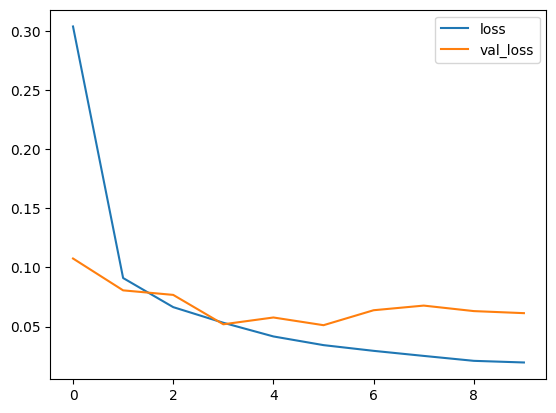

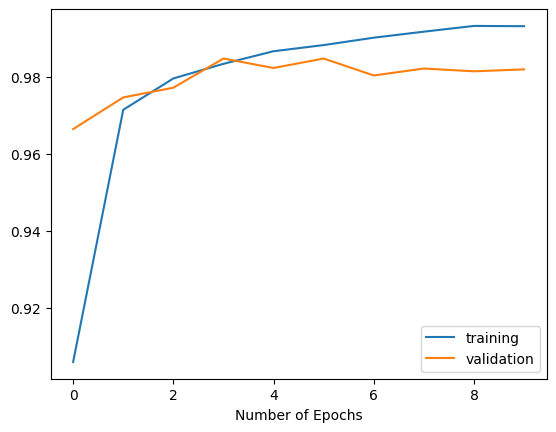

In [60]:
# Plot training vs validation accruacy
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.xlabel('Number of Epochs')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

In [68]:
print("Minimum Loss: {:0.4f}".format(history_frame['loss'].min()));
print("Minimum Validation Loss: {:0.4f}".format(history_frame['val_loss'].min()));
print("Accuracy: {:0.4f}".format(history_frame['accuracy'].min()));
print("Validation Accuracy: {:0.4f}".format(history_frame['val_accuracy'].min()));

Minimum Loss: 0.0196
Minimum Validation Loss: 0.0512
Accuracy: 0.9060
Validation Accuracy: 0.9665


In [ ]:
# PLOT CONFUSION MATRIX??? SUCH A GOOD IDEA!!!

In [69]:
# Save the model: pickle ou h5

import pickle

with open('../model.pickle', 'wb') as f:
    pickle.dump(model, f)
    f.close()


INFO:tensorflow:Assets written to: ram://735e68f6-cf13-4e32-86a8-d1549c0338bb/assets


INFO:tensorflow:Assets written to: ram://735e68f6-cf13-4e32-86a8-d1549c0338bb/assets


In [70]:
# model.save('model_Indi_1.h5')